# Analisis

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Cargar el dataset con el resultado de grafos randoms
### los "_tabu" son los experimentos de nuevo compilados con GA de sol inicial 

In [8]:
#df_resultados_tabu = pd.read_csv("resultados/resultado_tabu.csv");
#df_peor_caso_agm_tabu = pd.read_csv("resultados/resultado_agm_tabu.csv");
#df_resultados_random_param_tabu = pd.read_csv("resultados/resultado_tabu_params_random_tabu.csv");
#df_resultados_opt_param_tabu = pd.read_csv("resultados/resultado_tabu_params_opt_tabu.csv");


In [11]:
#df_resultados = pd.read_csv("resultados/resultado.csv");
# LO DE RANDOM LO CORRIMO?
df_eulerianos = pd.read_csv("resultados/resultado_euler.csv")
df_peor_caso_agm = pd.read_csv("resultados/resultado_agm_peor.csv");
df_resultados_opt_param = pd.read_csv("resultados/resultado_tabu_params_opt.csv");
df_resultados_opt_param_tabu = pd.read_csv("resultados/resultado_tabu_params_opt.csv")
#df_resultados_random_param = pd.read_csv("resultados/resultado_tabu_params_random.csv");


### Dropeamos los de TABU de antes

In [201]:
#df_resultados = df_resultados.drop(((df_resultados["metodo"] == "TABU_CICLOS") | (df_resultados["metodo"] == "TABU_ESTRUCTURA")).index, axis = 0, inplace=True)
#df_peor_caso_agm = df_peor_caso_agm.drop(((df_peor_caso_agm["metodo"] == "TABU_CICLOS") | (df_peor_caso_agm["metodo"] == "TABU_ESTRUCTURA")).index, axis = 0, inplace=True)
#df_resultados_random_param = df_resultados_random_param.drop(((df_resultados_random_param["metodo"].str.contains("TABU_CICLOS")) | (df_resultados_random_param["metodo"].str.contains("TABU_ESTRUCTURA"))).index, axis = 0, inplace=True)
#df_resultados_opt_param = df_resultados_opt_param.drop(((df_resultados_opt_param["metodo"].str.contains("TABU_CICLOS")) | (df_resultados_opt_param["metodo"].str.contains("TABU_ESTRUCTURA"))).index, axis = 0, inplace=True)

### Le agregamos los nuevos datos TABU

In [ ]:
#df_resultados = df_resultados.append(df_resultados_tabu, ignore_index=True)
#df_peor_caso_agm = df_peor_caso_agm.append(df_peor_caso_agm_tabu, ignore_index=True)
#df_resultados_random_param = df_resultados_random_param.append(df_resultados_random_param_tabu, ignore_index=True)
#df_resultados_opt_random = df_resultados_opt_random.append(df_resultados_opt_random, ignore_index=True)

# Experimento con eulerianos

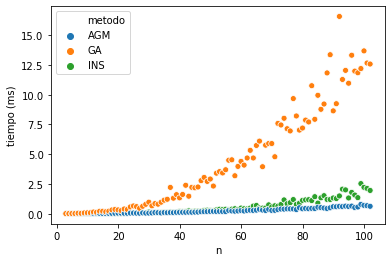

In [58]:
df_grafoEuleriano = df_eulerianos[df_eulerianos["dataset"]=="grafo-euleriano"].copy(); # lo usamos tambien abajo
fig = sns.scatterplot(data=df_grafoEuleriano, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

# Guardamos la figura
plt.savefig("graficos/tiempo-grafos-eulerianos.svg");

# Graficamos segun heuristicas

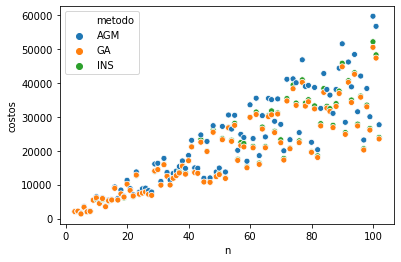

In [59]:
fig = sns.scatterplot(data=df_grafoEuleriano, x='n', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='costos');

plt.savefig("graficos/costo-grafos-eulerianos.svg");
## IGUAL AL DE ARRIBA PERO CON COSTOS

# ESTO NO LO CORRIMO

# Experimento grafos con pesos aleatorios
## Graficos para las heuristicas por:
- Tiempo en relacion al tamanio
- Costo en relacion al tamanio
- Relacion entre costo y tiempo

Estan en este orden los graficos

In [3]:
df_grafoPropio = df_resultados[df_resultados["dataset"]=="grafo-propio"].copy(); # lo usamos tambien abajo
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

# Guardamos la figura
plt.savefig("graficos/tiempo-grafos-propios.svg");

# Graficamos segun heuristicas

NameError: name 'df_resultados' is not defined

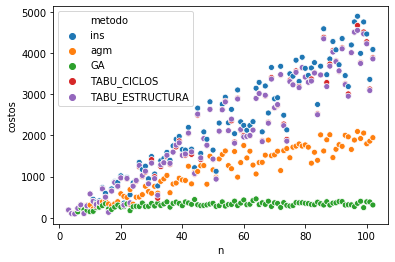

In [5]:
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costos');

plt.savefig("graficos/costo-grafos-propios.svg");
## IGUAL AL DE ARRIBA PERO CON COSTOS

**Borre sin querer la de tiempo/costo** pero creo que vale verga

---
---
# ACA ABAJO SI
# Experimento 2, Peor caso AGM

## Cargar el dataframe de los resultados


In [60]:
df_peor_caso_agm.head()

,dataset,n,m,metodo,tiempo,costo
0,peor-caso-agm,3,3.0,INS,0.03886,196
1,peor-caso-agm,3,3.0,AGM,0.04746,196
2,peor-caso-agm,3,3.0,GA,0.04708,196
3,peor-caso-agm,4,6.0,INS,0.02764,227
4,peor-caso-agm,4,6.0,AGM,0.02246,351


### Costo

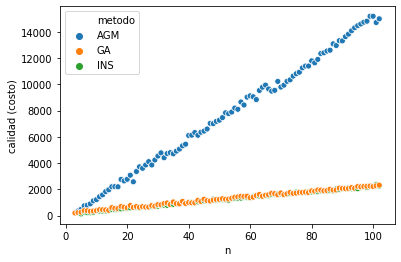

In [61]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='n', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='calidad (costo)');

plt.savefig("graficos/costo-peor-caso-agm.svg");


### Tiempo-Costo

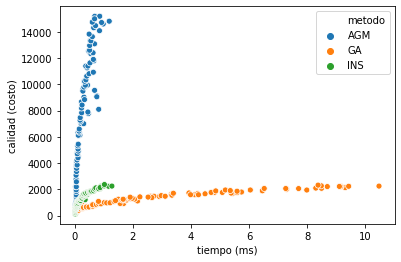

In [62]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='tiempo', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='tiempo (ms)', ylabel='calidad (costo)');

plt.savefig("graficos/tiempo-costo-peor-caso-agm.svg");


---
---

# ETO SI TAMO PIOLA MAESTRO

# Experimento Gap entre optimos

In [63]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_opts.head()

,dataset,n,m,metodo,tiempo,costo,gap
0,sol_optimas,1432,1024596.0,INS,3685.763333,173256,13.261424
1,sol_optimas,1432,1024596.0,AGM,77.754900,218883,43.088841
2,sol_optimas,1432,1024596.0,GA,16095.133333,182713,19.443682
3,sol_optimas,666,221445.0,INS,265.638667,345738,17.454936
4,sol_optimas,666,221445.0,AGM,17.808367,399767,35.809796


### Costo

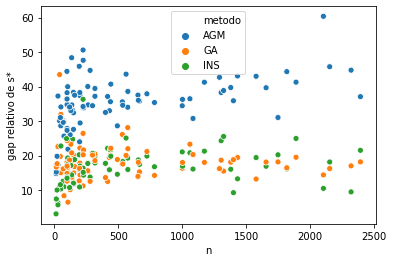

In [135]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts ##[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
fig = sns.scatterplot(data=df_optt, x='n', y='gap', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='gap relativo de s*');

plt.savefig("graficos/tiempo-heuristicas-opt.svg");

### Tiempo

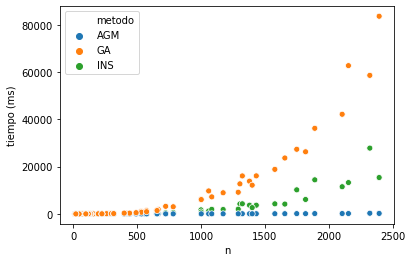

In [134]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts ##[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
#df_optt = df_optt[df_optt["tiempo"] < 40000]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas-opt.svg");

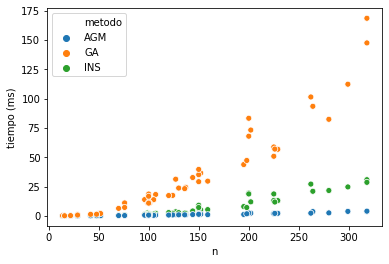

In [133]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[df_opts["n"] < 400]  
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo',hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas-opt-cerca.svg");

---
---

# Y ESTO NO, PERO QUIEN LO QUIERE A ETO

# Experimento TABU_CICLOS parametros para grafo random G100


In [140]:
ciclos_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_CICLOS", na=False)].copy();
ciclos_random_param = ciclos_random_param[(ciclos_random_param["memoria"] > 0) & (ciclos_random_param["vecindad"] > 0)] 
ciclos_random_param.head()

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones
0,grafo-propio,100,4950.0,TABU_CICLOS 10 10 100,102.824,306,10,10,100
1,grafo-propio,100,4950.0,TABU_CICLOS 10 10 150,132.137,306,10,10,150
2,grafo-propio,100,4950.0,TABU_CICLOS 10 10 200,205.960,273,10,10,200
3,grafo-propio,100,4950.0,TABU_CICLOS 10 10 250,236.842,275,10,10,250
4,grafo-propio,100,4950.0,TABU_CICLOS 10 10 300,243.667,275,10,10,300


## VECINDAD

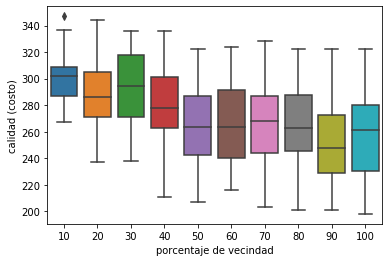

In [154]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-vecindad-costo.svg");

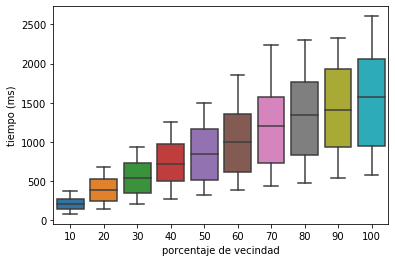

In [153]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-vecindad-tiempo.svg");

## MEMORIA

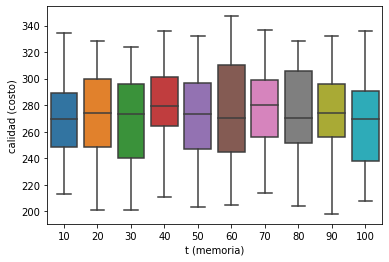

In [155]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='costo');
fig.set(xlabel='t (memoria)', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-memoria-costo.svg");

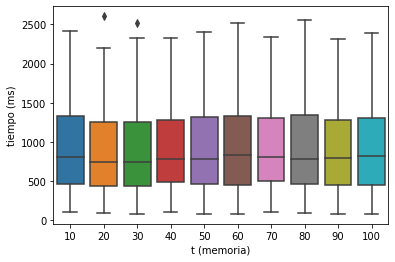

In [156]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-memoria-tiempo.svg");

### ITERACIONES

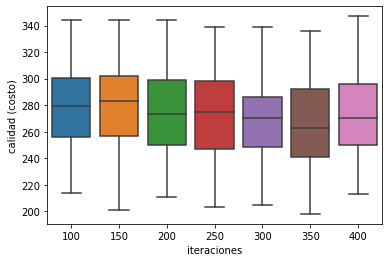

In [157]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-iteraciones-costo.svg");

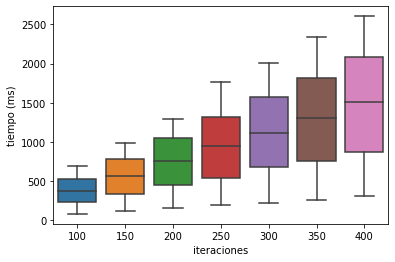

In [158]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-iteraciones-tiempo.svg");

# RANDOMS CON TABU_ESTRUCTURA

In [29]:
estructura_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_ESTRUCTURA", na=False)].copy();
estructura_random_param = estructura_random_param[(estructura_random_param["memoria"] > 0) & (estructura_random_param["vecindad"] > 0)] 
estructura_random_param.head()

NameError: name 'df_resultados_random_param' is not defined

### VECINDAD

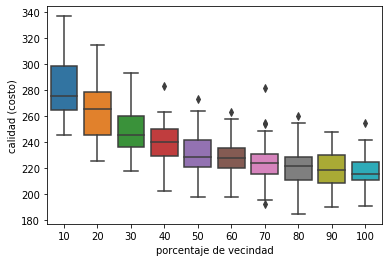

In [169]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/estructura-vecindad-costo.svg");

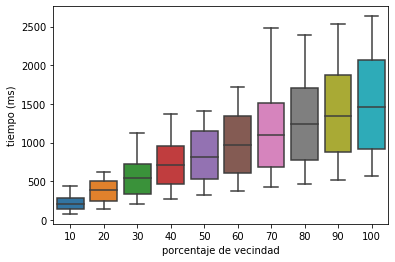

In [173]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-vecindad-tiempo.svg");

### MEMORIA

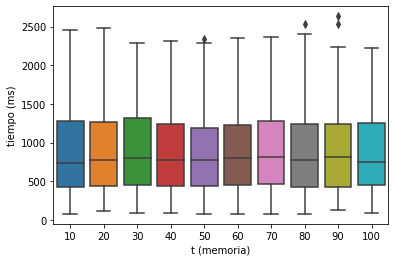

In [174]:
fig = sns.boxplot(data=estructura_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-memoria-tiempo.svg");

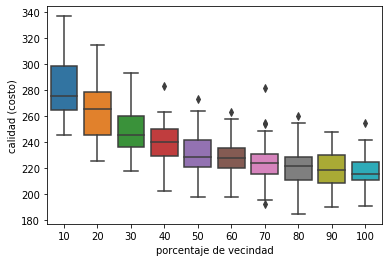

In [175]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/estructura-vecindad-costo.svg");

### ITERACIONES

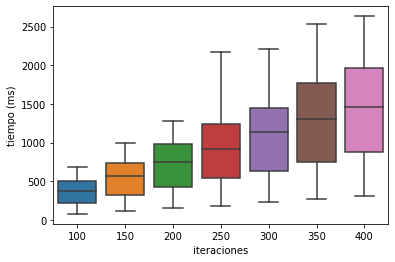

In [176]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-iteraciones-tiempo.svg");

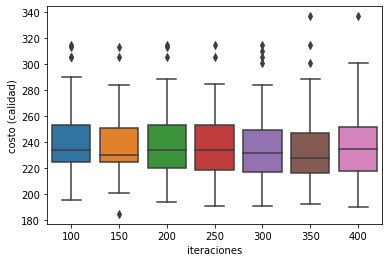

In [177]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='costo (calidad)');

plt.savefig("graficos/estructura-iteraciones-costo.svg");

---
---

# Experimento TABU_CICLOS parametros para LAS 10 INSTANCIAS

In [67]:
optimosPorN = {127:118282 , 198:15780 , 280:2579 , 318:42029 , 439:107217 , 225:3919, 299:48191, 195:2323, 152:73682, 400:15281}
print(optimosPorN[127])

118282


In [68]:
def func(x):
    nodos = x["n"]
    optimo = optimosPorN[nodos]
    costo = x["costo"]
    return (costo/optimo)*100 - 100

In [69]:
ciclos_opt_param = df_resultados_opt_param[df_resultados_opt_param["metodo"].str.contains("TABU_CICLOS")]
ciclos_opt_param = ciclos_opt_param[(ciclos_opt_param["memoria"] > 0)]
#ciclos_opt_param["gap"] = ciclos_opt_param["costo"] - optimo_linhp
ciclos_opt_param["gap"] = ciclos_opt_param.apply(lambda row: func(row), axis=1)
ciclos_opt_param.head()
#display(eeee)
# COn eso ultimo chequie el costo, agarrando el optimo y haciendole optimo + optimo*gap/100 y daba bien

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones,gap
0,sol_optimas,127,8001.0,TABU_CICLOS 40 10 100,133.299,125739,40,10,100,6.304425
1,sol_optimas,127,8001.0,TABU_CICLOS 40 10 200,155.572,124463,40,10,200,5.225647
2,sol_optimas,127,8001.0,TABU_CICLOS 40 10 300,237.366,124290,40,10,300,5.079387
3,sol_optimas,127,8001.0,TABU_CICLOS 40 10 400,332.314,124242,40,10,400,5.038806
4,sol_optimas,127,8001.0,TABU_CICLOS 40 10 500,413.010,124135,40,10,500,4.948344


# JITMAPS PIOLA 

In [117]:
ciclos = ciclos_opt_param.copy();

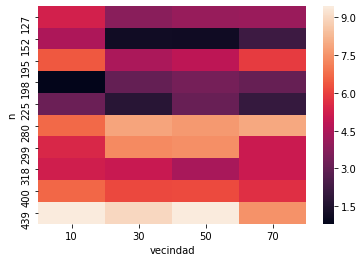

In [124]:
vecindad = pd.pivot_table(ciclos, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/heatmap-ciclos-vecindad");

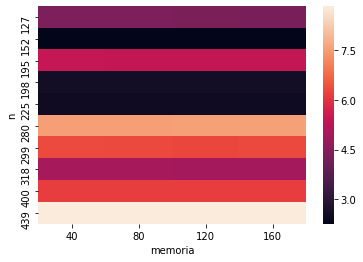

In [125]:
memoria = pd.pivot_table(ciclos, values='gap', index=['n'], columns='memoria')

sns.heatmap(memoria);

plt.savefig("graficos/heatmap-ciclos-memoria");

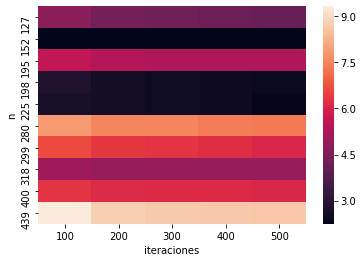

In [126]:
iteraciones = pd.pivot_table(ciclos, values='gap', index=['n'], columns='iteraciones')
sns.heatmap(iteraciones);

plt.savefig("graficos/heatmap-ciclos-iteraciones");

### VECINDAD

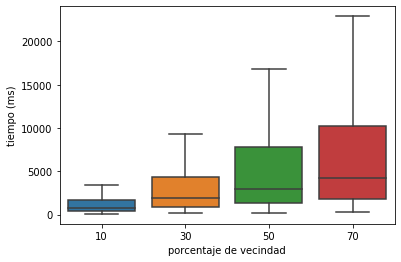

In [70]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='tiempo', showfliers = False);
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-vecindad-tiempo-opt.svg");

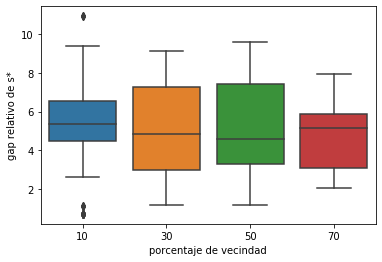

In [72]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap relativo de s*');

plt.savefig("graficos/ciclos-vecindad-gap-opt.svg");

### MEMORIA

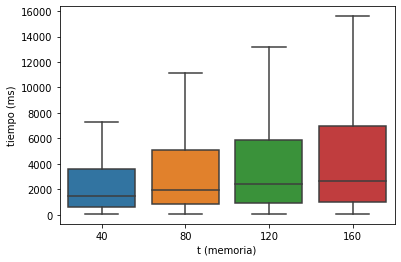

In [73]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='tiempo', showfliers = False);
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-memoria-tiempo-opt.svg");

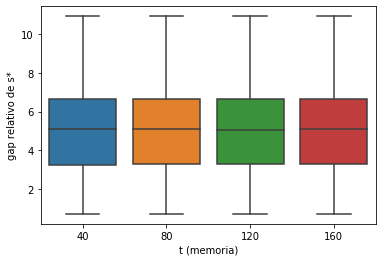

In [74]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='gap');
fig.set(xlabel='t (memoria)', ylabel='gap relativo de s*');

plt.savefig("graficos/ciclos-memoria-gap-opt.svg");

### ITERACIONES

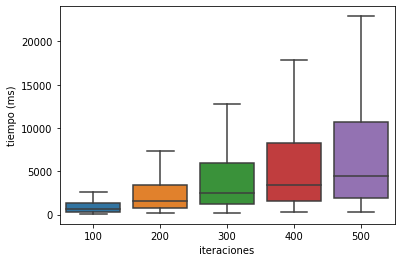

In [75]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='tiempo', showfliers = False);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-iteraciones-tiempo-opt.svg");

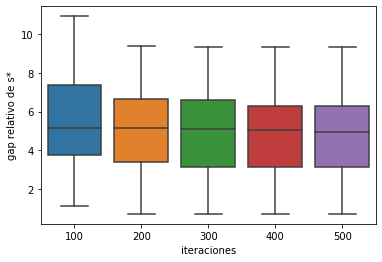

In [76]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap relativo de s*');

plt.savefig("graficos/ciclos-iteraciones-costo-opt.svg");

# Experimento TABU_ESTRUCTURA parametros para LAS 10 INSTANCIAS

In [95]:
estructura_opt_param = df_resultados_opt_param_tabu[df_resultados_opt_param_tabu["metodo"].str.contains("TABU_ESTRUCTURA")]
estructura_opt_param = estructura_opt_param[(estructura_opt_param["memoria"] > 0)]
estructura_opt_param["gap"] = estructura_opt_param.apply(lambda row: func(row), axis=1)
estructura_opt_param.head()


,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones,gap
80,sol_optimas,127,8001.0,TABU_ESTRUCTURA 40 10 100,74.6837,125407,40,10,100,6.02374
81,sol_optimas,127,8001.0,TABU_ESTRUCTURA 40 10 200,114.4710,125407,40,10,200,6.02374
82,sol_optimas,127,8001.0,TABU_ESTRUCTURA 40 10 300,143.2610,125407,40,10,300,6.02374
83,sol_optimas,127,8001.0,TABU_ESTRUCTURA 40 10 400,169.4260,125407,40,10,400,6.02374
84,sol_optimas,127,8001.0,TABU_ESTRUCTURA 40 10 500,232.1740,125407,40,10,500,6.02374


# JITMAPS PIOLA

In [119]:
estructura = estructura_opt_param.copy();

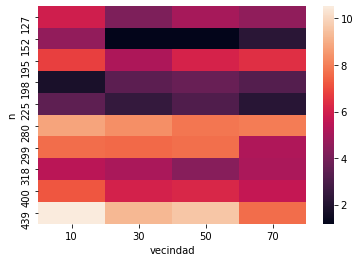

In [127]:
vecindad = pd.pivot_table(estructura, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/heatmap-estructura-vecindad");

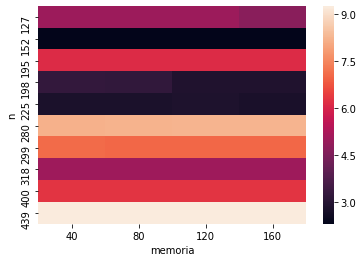

In [128]:
memoria = pd.pivot_table(estructura, values='gap', index=['n'], columns='memoria')

sns.heatmap(memoria);

plt.savefig("graficos/heatmap-estructura-memoria");

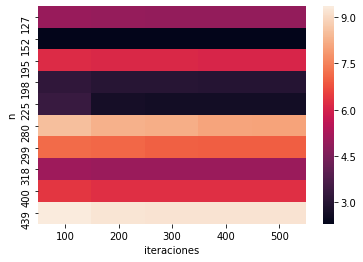

In [129]:
iteraciones = pd.pivot_table(estructura, values='gap', index=['n'], columns='iteraciones')

sns.heatmap(iteraciones);

plt.savefig("graficos/heatmap-estructura-iteraciones");

### VECINDAD

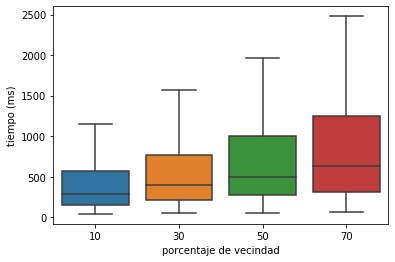

In [78]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='tiempo', showfliers = False);
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-vecindad-tiempo-opt.svg");

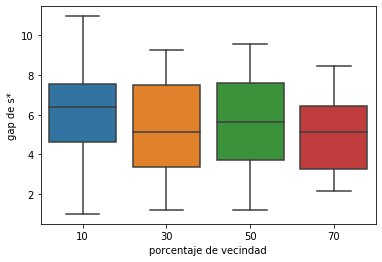

In [79]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap de s*');

plt.savefig("graficos/estructura-vecindad-gap-opt.svg");

### MEMORIA

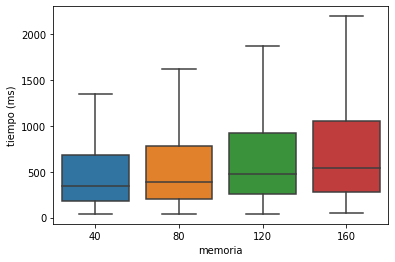

In [80]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='tiempo', showfliers = False);
fig.set(xlabel='memoria', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-memoria-tiempo-opt.svg");

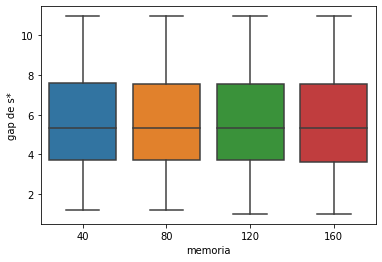

In [81]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='gap');
fig.set(xlabel='memoria', ylabel='gap de s*');

plt.savefig("graficos/estructura-memoria-gap-opt.svg");

### ITERACIONES

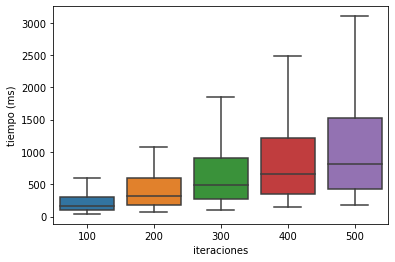

In [82]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='tiempo', showfliers = False);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-iteraciones-tiempo-opt.svg");

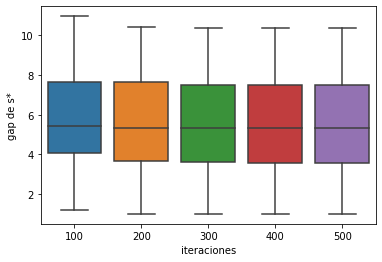

In [83]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap de s*');

plt.savefig("graficos/estructura-iteraciones-gap-opt.svg");

# ESTO HAY QUE VER QUE ONDA, NO LO HICIMO
## ES LO DE UNA VEZ TENEMOS LOS PARAMETROS USAR LAS DISTINTAS HEUR INICIALES

# TABU mejores parametros
## Usando en tabu como heuristica inicial
### agm

In [213]:
agm_comparacion = df_TABU_agm.copy();
agm_comparacion.head()
agm_comparacion.loc[agm_comparacion["metodo"].str.contains("TABU_CICLOS"), "metodo"] = "TABU_CICLOS"
agm_comparacion.loc[agm_comparacion["metodo"].str.contains("TABU_ESTRUCTURA"), "metodo"] = "TABU_ESTRUCTURA"

agm_randoms = df_resultados[df_resultados["metodo"] == "agm"].copy()
agm_comparacion = agm_comparacion.append(agm_randoms, ignore_index = True)

# Limpie los parametros que entraban

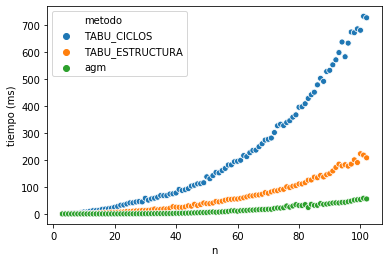

In [215]:
fig = sns.scatterplot(data = agm_comparacion, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_agm.svg");

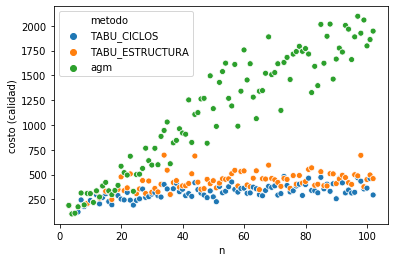

In [217]:
fig = sns.scatterplot(data = agm_comparacion, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costo (calidad)');

plt.savefig("graficos/costo-TABU_agm.svg");

### GA

In [222]:
GA_comparacion = df_TABU_GA.copy();
GA_comparacion.head()
GA_comparacion.loc[GA_comparacion["metodo"].str.contains("TABU_CICLOS"), "metodo"] = "TABU_CICLOS"
GA_comparacion.loc[GA_comparacion["metodo"].str.contains("TABU_ESTRUCTURA"), "metodo"] = "TABU_ESTRUCTURA"

GA_randoms = df_resultados[df_resultados["metodo"] == "GA"].copy()
GA_comparacion = GA_comparacion.append(GA_randoms, ignore_index = True)

# Limpie los parametros que entraban

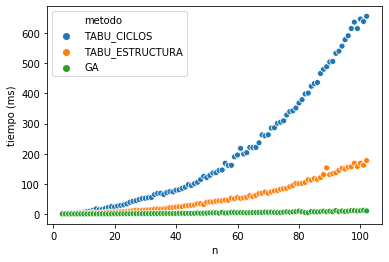

In [223]:
fig = sns.scatterplot(data = GA_comparacion, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_GA.svg");

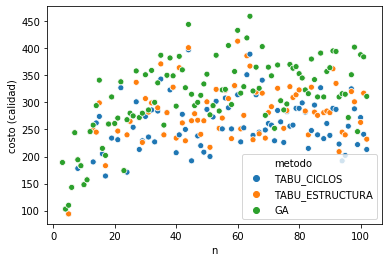

In [224]:
fig = sns.scatterplot(data = GA_comparacion, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costo (calidad)');

plt.savefig("graficos/costo-TABU_GA.svg");

### ins

In [232]:
ins_comparacion = df_TABU_ins.copy();
ins_comparacion.head()
ins_comparacion.loc[ins_comparacion["metodo"].str.contains("TABU_CICLOS"), "metodo"] = "TABU_CICLOS"
ins_comparacion.loc[ins_comparacion["metodo"].str.contains("TABU_ESTRUCTURA"), "metodo"] = "TABU_ESTRUCTURA"

ins_randoms = df_resultados[df_resultados["metodo"] == "ins"].copy()
ins_comparacion = ins_comparacion.append(ins_randoms, ignore_index = True)

# Limpie los parametros que entraban

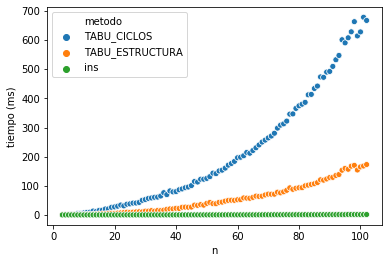

In [233]:
fig = sns.scatterplot(data = ins_comparacion, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_ins.svg");

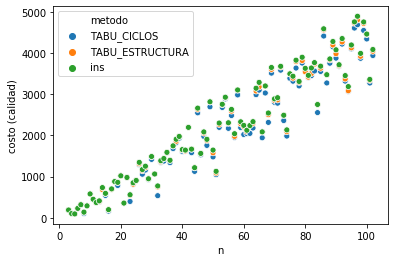

In [234]:
fig = sns.scatterplot(data = ins_comparacion, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costo (calidad)');

plt.savefig("graficos/costo-TABU_ins.svg");